<h2>Importing Data<h2>

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np


In [123]:
df1 = pd.read_json('./Datasets/generated_data_Economics.json')
df2 = pd.read_csv('./Datasets/VOO.csv')
df2.head()
df1.head()

,Economics
2022-09-01 12:40:00,"{'polarity': 0.4, 'subjectivity': 0.7000000000..."
2022-09-01 12:42:00,"{'polarity': 0.5, 'subjectivity': 0.6000000000..."
2022-09-01 12:43:00,"{'polarity': 0.1, 'subjectivity': 0.4, 'compou..."
2022-09-01 12:44:00,"{'polarity': 0.5, 'subjectivity': 0.925, 'comp..."
2022-09-01 12:47:00,"{'polarity': 0.1071428571, 'subjectivity': 0.3..."


<h3>Preparing The Subreddit Sentiment Data </h3>

In [124]:
df1.reset_index(inplace=True)
df1['index'] = pd.to_datetime(df1['index'])
df1['date'] = df1['index'].dt.date
df1['time'] = df1['index']
df1 = df1.groupby('date').agg(list)
df1.reset_index(inplace=True)
df1 = df1[['date', 'time', 'Economics']]
df1.head()

,date,time,Economics
0,2022-09-01,"[2022-09-01 12:40:00, 2022-09-01 12:42:00, 202...","[{'polarity': 0.4, 'subjectivity': 0.700000000..."
1,2022-09-02,"[2022-09-02 09:41:00, 2022-09-02 09:42:00, 202...","[{'polarity': 0.0, 'subjectivity': 0.0, 'compo..."
2,2022-09-03,"[2022-09-03 09:36:00, 2022-09-03 09:38:00, 202...","[{'polarity': 0.1, 'subjectivity': 1.3, 'compo..."
3,2022-09-04,"[2022-09-04 09:42:00, 2022-09-04 09:43:00, 202...","[{'polarity': 0.0, 'subjectivity': 0.0, 'compo..."
4,2022-09-05,"[2022-09-05 12:56:00, 2022-09-05 13:00:00, 202...","[{'polarity': 0.0, 'subjectivity': 0.0, 'compo..."


<h3>Preparing The Stock Price Data<h3>

In [125]:
df2['date_time'] = pd.to_datetime(df2['Unnamed: 0'])
df2['date'] = df2['date_time'].dt.date
df2['time'] = df2['date_time'].dt.tz_localize(None)
df2.rename(columns={'Adj Close': 'price'}, inplace=True)
df2 = df2[['price', 'date', 'time']]
df2.head(5)


,price,date,time
0,369.648010,2022-08-29,2022-08-29 09:30:00
1,369.799988,2022-08-29,2022-08-29 09:31:00
2,370.220001,2022-08-29,2022-08-29 09:33:00
3,370.549988,2022-08-29,2022-08-29 09:34:00
4,370.299988,2022-08-29,2022-08-29 09:35:00


In [126]:
df2 = df2.groupby('date').agg(list)
df2['time_price'] = df2.apply(lambda row : dict(zip(row[0],row[1])), axis=1)
df2.reset_index(inplace=True)
df2.head()

,date,price,time,time_price
0,2022-08-29,"[369.6480102539063, 369.7999877929688, 370.220...","[2022-08-29 09:30:00, 2022-08-29 09:31:00, 202...","{369.6480102539063: 2022-08-29 09:30:00, 369.7..."
1,2022-08-30,"[371.2200012207031, 370.760009765625, 371.0400...","[2022-08-30 09:30:00, 2022-08-30 09:31:00, 202...","{371.2200012207031: 2022-08-30 09:30:00, 370.7..."
2,2022-08-31,"[367.0400085449219, 367.0700073242188, 366.660...","[2022-08-31 09:30:00, 2022-08-31 09:31:00, 202...","{367.0400085449219: 2022-08-31 09:30:00, 367.0..."
3,2022-09-01,"[361.5299987792969, 360.8349914550781, 360.959...","[2022-09-01 09:30:00, 2022-09-01 09:31:00, 202...","{361.5299987792969: 2022-09-01 09:30:00, 360.8..."
4,2022-09-02,"[367.3999938964844, 366.8800048828125, 366.709...","[2022-09-02 09:30:00, 2022-09-02 09:31:00, 202...","{367.3999938964844: 2022-09-02 09:30:00, 366.8..."


<h3>Merging The Sentiment Data And Stock Price Data<h3>

In [127]:
df = pd.merge(df1, df2, how='outer', on='date')
df['date'] =  pd.to_datetime(df['date'])
df.rename(columns={'time_x': 'sentiment_time', 'time_y':'stock_time'}, inplace=True)
df.dropna(inplace=True)
df['na'] = np.nan
df.head()

,date,sentiment_time,Economics,price,stock_time,time_price,na
0,2022-09-01,"[2022-09-01 12:40:00, 2022-09-01 12:42:00, 202...","[{'polarity': 0.4, 'subjectivity': 0.700000000...","[361.5299987792969, 360.8349914550781, 360.959...","[2022-09-01 09:30:00, 2022-09-01 09:31:00, 202...","{361.5299987792969: 2022-09-01 09:30:00, 360.8...",NaN
1,2022-09-02,"[2022-09-02 09:41:00, 2022-09-02 09:42:00, 202...","[{'polarity': 0.0, 'subjectivity': 0.0, 'compo...","[367.3999938964844, 366.8800048828125, 366.709...","[2022-09-02 09:30:00, 2022-09-02 09:31:00, 202...","{367.3999938964844: 2022-09-02 09:30:00, 366.8...",NaN
5,2022-09-06,"[2022-09-06 12:30:00, 2022-09-06 12:46:00, 202...","[{'polarity': 0.8, 'subjectivity': 1.0, 'compo...","[362.0299987792969, 361.6700134277344, 361.609...","[2022-09-06 09:30:00, 2022-09-06 09:31:00, 202...","{362.0299987792969: 2022-09-06 09:30:00, 361.6...",NaN
6,2022-09-07,"[2022-09-07 12:40:00, 2022-09-07 12:46:00, 202...","[{'polarity': 0.1, 'subjectivity': 0.700000000...","[358.7699890136719, 359.3039855957031, 359.040...","[2022-09-07 09:30:00, 2022-09-07 09:31:00, 202...","{358.7699890136719: 2022-09-07 09:30:00, 359.3...",NaN
7,2022-09-08,"[2022-09-08 13:00:00, 2022-09-08 13:01:00, 202...","[{'polarity': -0.2, 'subjectivity': 0.0, 'comp...","[362.5960083007813, 362.9599914550781, 362.929...","[2022-09-08 09:30:00, 2022-09-08 09:31:00, 202...","{362.5960083007813: 2022-09-08 09:30:00, 362.9...",NaN


<h3>Determining Percent Change In Price<h3>

In [128]:
def generate_price_dif(row):
    prices = np.asarray(row['price'])
    price_shift = np.asarray(row['price'][1:] + row['price'][0:1])
    delta_price = price_shift-prices
    return delta_price

df['price_diff']  = df.apply(lambda row: generate_price_dif(row), axis=1)
df['percent_change'] = df.apply(lambda row: (row['price_diff']/np.asarray(row['price'])) * 100, axis= 1)
df.head()

,date,sentiment_time,Economics,price,stock_time,time_price,na,price_diff,percent_change
0,2022-09-01,"[2022-09-01 12:40:00, 2022-09-01 12:42:00, 202...","[{'polarity': 0.4, 'subjectivity': 0.700000000...","[361.5299987792969, 360.8349914550781, 360.959...","[2022-09-01 09:30:00, 2022-09-01 09:31:00, 202...","{361.5299987792969: 2022-09-01 09:30:00, 360.8...",NaN,"[-0.69500732421875, 0.125, -0.3800048828125, -...","[-0.1922405682973575, 0.034641873144268434, -0..."
1,2022-09-02,"[2022-09-02 09:41:00, 2022-09-02 09:42:00, 202...","[{'polarity': 0.0, 'subjectivity': 0.0, 'compo...","[367.3999938964844, 366.8800048828125, 366.709...","[2022-09-02 09:30:00, 2022-09-02 09:31:00, 202...","{367.3999938964844: 2022-09-02 09:30:00, 366.8...",NaN,"[-0.519989013671875, -0.170013427734375, -0.19...","[-0.14153212365550089, -0.04634033620575209, -..."
5,2022-09-06,"[2022-09-06 12:30:00, 2022-09-06 12:46:00, 202...","[{'polarity': 0.8, 'subjectivity': 1.0, 'compo...","[362.0299987792969, 361.6700134277344, 361.609...","[2022-09-06 09:30:00, 2022-09-06 09:31:00, 202...","{362.0299987792969: 2022-09-06 09:30:00, 361.6...",NaN,"[-0.3599853515625, -0.060028076171875, -0.1149...","[-0.09943522712932877, -0.016597471159678894, ..."
6,2022-09-07,"[2022-09-07 12:40:00, 2022-09-07 12:46:00, 202...","[{'polarity': 0.1, 'subjectivity': 0.700000000...","[358.7699890136719, 359.3039855957031, 359.040...","[2022-09-07 09:30:00, 2022-09-07 09:31:00, 202...","{358.7699890136719: 2022-09-07 09:30:00, 359.3...",NaN,"[0.53399658203125, -0.26397705078125, 0.130004...","[0.14884092827811768, -0.07346900155966622, 0...."
7,2022-09-08,"[2022-09-08 13:00:00, 2022-09-08 13:01:00, 202...","[{'polarity': -0.2, 'subjectivity': 0.0, 'comp...","[362.5960083007813, 362.9599914550781, 362.929...","[2022-09-08 09:30:00, 2022-09-08 09:31:00, 202...","{362.5960083007813: 2022-09-08 09:30:00, 362.9...",NaN,"[0.36398315429681816, -0.029998779296818157, -...","[0.10038255964331692, -0.008265037470536463, -..."


<h2>Visualizing Trends In News Sentiment and Stock Prices</h2>

<p>Visualizing the data should reveal trends in the prices that make be unintuitive given large sets of numbers. This should provide us with a solid basis for attempting to explore correlations in stock prices and news sentiment.</p>

<h3>Plotting Sentiment Versus Price</h3>

<p>We begin by exploring the intesnity of sentiment per minute with data to the daily graph of our given stock.</p>

In [130]:
from helper import Analyzer

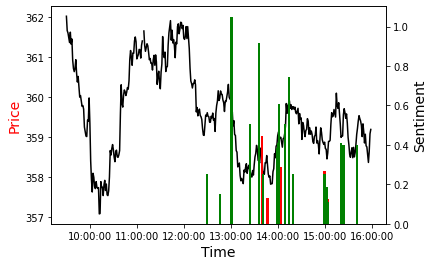

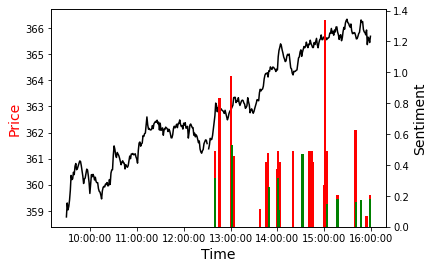

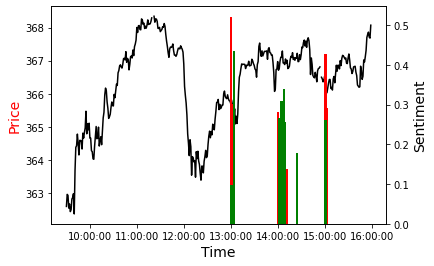

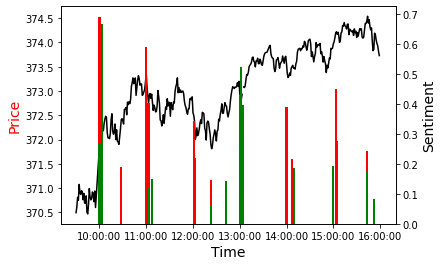

In [131]:
analyzer = Analyzer(['Economics'], df)
analyzer.plot_subreddits_day(['Economics'], ['neg', 'pos'], 2, 5)

<p>Now lets explore the relationship between change in price and the sentiment intensities</p>

<h3>Initial Hypothesis</h3>
<p>blah blah blah</p>

<h2>Markov Chains<h2>

<h3>Nth Degree Markov Chains<h3>

<h3>Optimizing Nth Degree Markov Chains<h3>

<h2>Deep Neural Network<h2>

<h2>LSTM Networks<h2>